# DSCI 100 Review Session Worksheet

>## Authors: Johnson Chen, Lotus Wei & Omer Tahir

Disclaimer: This worksheet contains materials from the DSCI 100 weekly worksheets and tutorials as well as our personal notes.

### Loading relevant packages for notebook

In [70]:
library(tidyverse)
library(readxl)
library(DBI)
library(dbplyr)
library(RPostgres)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows

## Chapter 1: Intro to Data Science

### 1.0 Important packages for chapter 1
___

* `tidyverse`
    * tidyverse is a meta package. A meta package is a package that contains several other packages as well.
    * This package allows us to gain access to useful functions for reading and wrangling the data.
    * Functions such as `filter()`, `select()` and `mutate()` are part of the tidyverse package.

### 1.1 Basic functions used in data science and how they work
___

> **Remember that you can search up on how a function works by checking the R documentation for it online.**

* `install.packages("package_name")`
    * This function is used to install new packages into your server (local or UBC's).
    * Although R has its own built-in functions, we can also use functions that are stored in packages created by other R users.
    * You only have to install a package once.
    * Remember that after installing a package you still have to load it into your workspace to use its functions.

* `library(package_name)`
    * This function is used to load packages into your workspace.
    * Every time you use a new workspace/jupyter notebook, you will have to load the packages again to use them.
    * Remember that you can only load packages that are already installed on your server (local or UBC's).

* `nrow(data_frame)`
    * Computes the total number of rows in a data frame.

* `ncol(data_frame)`
    * Computes the total number of columns in a data frame.

* `is.na(...)`
    * Checks for missing (NA) values in a vector.
    * Returns true/false for each value in the selected column or vector.
    * If the value is NA, it returns TRUE otherwise it returns FALSE.
    * You can use `!is.na()` to get TRUE for values that are NOT missing. This may be useful when filtering out for rows that do not have any missing values.

* `head(n = ...)`
    * Returns the n first rows data frame.

* `tail(n = ...)`
    * Returns the n last rows of a data frame.

* `slice(n, m, ...)`
    * obtains the nth, mth and any other specified rows of the dataframe.

* `arrange(dataframe, col_name)`
    * This function takes column names as input and orders the rows in the data frame in ascending order based on the values in the columns.
  
* `arrange(dataframe, desc(col_name))`
    * This function takes column names as input and orders the rows in the data frame in descending order based on the values in the columns.

### 1.2 Access R documentation via Jupyter
___

* Insert `?` before the name of the function you want help with and R will provide you with its documentation.
    * Eg. `?read_csv`

### 1.3 Filter, Select, Mutate workflow 
___

> **These 3 functions are extremely useful to manipulate and wrangle data. We ALWAYS wrangle the data set before performing any kind of analyses..**

* `filter(data_frame, column_name == VALUE)`
    * Filters and obtains the subset of rows with desired values from a data frame.
    * The 1st argument requires you to input the data frame that you want to subset.
    * The 2nd argument is the logical operator. The VALUE can be a string or integer. It filters out all the rows for which the logic is TRUE.
    * You can use logical operators such as `==`, `!=`, `>=`, `<=`, `<` or `>`.
    * Eg. `filter(df, !is.na(pct_vaccinated))`
    * Eg. `filter(df, who_region != "(WHO) Global")`
    * Eg. You could combine multiple filter statements into one single statement:  
    `filter(df, !is.na(pct_vaccinated), who_region != "(WHO) Global")`  
    * Eg. `filter(df, states %in% c("CA", "WA", "OR"))` where `states` is a column with names of different states.

* `select(data_frame, column_name_1, column_name_2, ...)`
    * Select one or more columns from your dataset and transfer them into their own data frame.

* `mutate(data_frame, new_column = transformation_formula)`
    * Add columns to a dataset, typically by making use of existing columns to compute a new column.
    * We can also use this function to manipulate the column itself.
    * Eg. `mutate(data_frame, column_name = as.numeric(column_name))` can be used to convert the column type character to numerical.
    * Eg. `mutate(data_frame, column_name = as_factor(column_name))` can be used to convert the column type character to factor (categorical). This is especially useful when using the `group_by()` function to group by categories.
    * Eg. `mutate(data_frame, new_column = old_column * 10)` can be used to create a new column that has values 10 times that of the old column.

## Chapter 2: Intro to Reading Data

### 2.0 Important packages for chapter 2
___

* `readxl`
    * readxl PACKAGE provides the `read_excel()` function to load a sheet from an excel file into R.
>
* `DBI`
    * DBI PACKAGE provides `dbConnect()` function to connect to SQLite database.
    * DBI PACKAGE provides `dbListTables()` function to list the tables in a database.
>
* `dbplyr`
    * dbplyr PACKAGE provides `tbl()` function to help create a reference to a database table that is queriable.
    * dbplyr PACKAGE provides `collect()` function to retrieve data from a database query and bring it into R.
>
* `RPostgres`
    * RPostgress PACKAGE allows us to work on PostgreSQL databases.

### 2.1 Absolute Path vs Relative Path
___

> **In order to read a file into R, you have to use the path of that file as the argument for the `read_...()` functions. There are two types of paths: Absolute path and Relative path. Another way to read a file is by using a url as the argument for the `read_csv()` function.**

* RELATIVE PATH
    * Where the file is with respect to the folder you currently are in on the computer.
    * Eg. `read_csv("data/happiness_report.csv")`
>
* ABSOLUTE PATH
    * Where the file is in respect to the base (or root) folder of the computer’s filesystem.
    * **Always starts with `/`.**
    * Eg. `read_csv("/home/jupyter/dsci-100/worksheet_02/data/happiness_report.csv")`

### 2.2 Read delimited files (including csv & tsv) into a tibble
___

* `read_delim("data/...", delim = "...", skip = ..., col_names = TRUE)`
    * The 1st argument requires you to input the path or file name.
    * The 2nd argument, delim, specifies which delimiter to use. (eg. `"/t"` or `" "` or `","` or `";"`)
    * The 3rd argument, skip, specifies the lines which must be skipped. This may be because these lines are metadata. (eg. `skip = 2`)
    * The 4th argument, col_names, is FALSE only if there is no HEADER. It is TRUE by default.

* `read_csv(...)`
    * loads dataset in "comma separated values" format as a data frame object.

* `read_csv2(...)`
    * uses `;` as delimiter and `,` for the decimal point otherwise same as read_csv().

* `read_tsv(...)`
    * loads dataset in "tab separated values" format as a data frame object.

* `read_excel(...)`
    * loads dataset in "xlsx" format as a data frame object.

* `read_csv("url")`
    * Reads tabular data directly from a URL that contains tabular data.
	* Eg. `read_csv("https://raw.githubusercontent.com/UBC-DSCI/introduction-to-datascience/master/data/can_lang.csv")`

### 2.2.1 Read delimited files exercise
___

> **Note:** When reading files into R you need to check:
> 1) The file type i.e `.csv` or `.xlsx` file
> 2) In the case it is a `.csv` file, you have to further inspect the format of the file to read it properly. You do this by right clicking the file -> Open With -> Editor.


|File Name                       | delim      | Header | Metadata | skip               | read_*   |
|--------------------------------|------------|--------|----------|--------------------|----------|
|`_.csv`                         |`";"`, `","`, `"\"`, or `"tab"`|`"yes"`or `"no"`|`"yes"`or `"no"`|`NA` or # of lines|`read_*`|
|`happiness_report.csv`          |,           |yes     |no        |`NA`                  |`read_csv`  |
|`happiness_report_semicolon.csv`|;           |yes     |no        |`NA`                  |read_csv2 |
|`happiness_report.tsv`          |tab         |yes     |no        |`NA`                  |`read_tsv`  |
|`happiness_report_metadata.csv` |,           |yes     |yes       |2                   |`read_csv`  |
|`happiness_report_no_header.csv`|,           |no      |no      |`NA`                  |`read_csv`  |
|`happiness_report.xlsx`         |            |        |          |                    |`read_excel`|

### 2.2.2 Opening URL with `read_excel(...)` package
___

```
library(readxl)

download.file("url", destfile = "data/Test.xls")
df <- read_excel(path = "data/Test.xls", sheet = 1)
colnames(df) <- make.names(colnames(df))
```

> 1. `download.file()` downloads the file and writes it to disk
> 2. `read_excel()` reads that saved Excel file into R.
> 3. `make.names(...)` replaces all spaces with a . so that you can operate on the columns.

### 2.3 Connecting to a database in R
___

```
connection <- dbConnect(RSQLite::SQLite(), "...")				# replace ... with the database relative path
dbListTables(connection)										# gives the names of the tables present in the db
flight_data <- tbl(connection, "bos_flights")					# assigns the "bos_flight" table to the reference object
head(flight_data)												# shows first few rows of data
delay_data <- select(flight_data, ARRIVAL_DELAY, DEPARTURE_DELAY)
delay_dataframe <- collect(delay_data)							# downloads the transformed dataset
write_csv(delay_dataframe, "data/delay_data.csv")				# saves the downloaded dataset into designated path
```

> 1) Connect to the database using the `dbConnect()` function.
> 2) Check what tables (similar to R dataframes, Excel spreadsheets) are in the database using the `dbListTables()` function
> 3) Once you've picked a table, create an R object for it using the `tbl()` function
   The code creates a reference to a table in a database, so we do not have to store all its data in R's memory but can load data as it is needed.
   Creating a reference table allows us to use dplyr functions such as filter or select to explore the data.
> 4) `head()` function allows us to see the first few rows of a dataset.
> 5) Functions like `select()` and `filter()` DO work.
> 6) Use the `collect()` function to download the transformed data from the database and store it in a dataframe object called `delay_dataframe`
> 7) Use `write_csv()` function to write the dataframe to a file called `delay_data.csv`. Save the file in the `"data/..."` folder.

> **Note:**
> * some functions like `nrow()` (to count the rows) or `tail()` (to get the last rows of the table), won't work properly on databases.
> * to make these functions work, first select the data you want to operate on and then download it as a data frame object using the `collect()` function.

### 2.3.1 Advantages of a database
___

**1.** Enable storing large data sets across multiple computers with automatic redundancy and backups
  
**2.** Allow multiple users to access them simultaneously and remotely without conflicts and errors
  
**3.** Provide mechanisms for ensuring data integrity and validating input
  
**4.** Provide security to keep data safe For example, there are billions of Google searches conducted daily. Can you imagine if Google stored all of the data from those queries in a single .csv file!? Chaos would ensue!

## Chapter 3: Cleaning and Wrangling Data

### 3.0 Important packages for chapter 3.0
___

* `dplyr`
    * Part of the `tidyverse` metapackage. (if you load tidyverse you do not need to load this package)
    * This package is a data wrangling workhorse and provides functions like (`select`, `filter`, `mutate`, `arrange`, `summarize`, and `group_by`)

* `purrr`
    * Part of the `tidyverse` metapackage.
    * It allows us to use the `map()` and `map_df()` functions.

### 3.1 Criteria for TIDY DATA
___

**1)** Each row is a single observation
  
**2)** Each column is a single variable
  
**3)** Each value is a single cell

### 3.2 PIPE OPERATOR `|>`
___

* It takes the output from the function on the left-hand side of the pipe, and passes it as the first argument to the function on the right-hand side of the pipe.

```{r}
output <- data |>
	mutate(new_column = old_column * 2) |>
	filter(other_column > 5) |>
	select(new_column)
```

### 3.3 `pivot_longer()` and `pivot_wider()` functions to help create TIDY DATA
___

### 3.3.1 `pivot_longer()`

* `pivot_longer()` combines columns, thus making the data frame longer and narrower.
* It is often used to combine columns that are really part of the same variable but currently stored in separate columns.

```
pivot_longer(dataframe,
             cols = c("var1", "var2", ...),
             names_to = "new_column_1",
             values_to = "new_column_2")
             
```
* Input for 1st argument is the data frame
* Input for 2nd arguement are the names of the variables that we want to combine into a single column.
* Input for 3rd argument is the `new_column_1` that will be created, whose values will come from the **names** of the variables that we want to combine.
* Input for 4th argument is the `new column_2` that will be created, whose values will come from the **values** of the variables that we want to combine.

In [71]:
sea_surface <- read_csv("data/max_salinity.csv")
sea_surface

Rows: 105 Columns: 13

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
dbl (13): Year, Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1914,27.7,NA,NA,NA,NA,NA,NA,NA,27.4,28.4,26.6,27.1
1915,27.1,26.8,28.1,28.1,28.6,28.8,30.2,30.8,28.5,28.7,27.6,27.5
1916,27.6,27.1,27.2,27.5,28.0,29.0,25.0,27.0,28.3,28.0,27.3,27.1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2016,27.8,26.4,26.1,26.8,26.5,26.4,26.0,27.6,27.6,28.5,24.7,27.3
2017,28.0,27.9,28.2,26.1,26.7,26.9,25.4,26.7,27.6,28.7,27.7,27.4
2018,27.3,27.3,29.0,29.3,NA,NA,NA,NA,NA,NA,NA,NA


In [72]:
long_data <- sea_surface %>%
       select(Year, Dec, Jan, Feb) |>
       pivot_longer(cols = -Year,
                    names_to = "Month",
                    values_to = "Salinity") 

long_data

Year,Month,Salinity
<dbl>,<chr>,<dbl>
1914,Dec,27.1
1914,Jan,27.7
1914,Feb,NA
⋮,⋮,⋮
2018,Dec,NA
2018,Jan,27.3
2018,Feb,27.3


### 3.3.2 `pivot_wider()`

* Suppose we have observations spread across multiple rows rather than in a single row.
* `pivot_wider()` generally increases the number of columns (widens the data frame) and decreases the number of rows in a data set.

```
pivot_wider(dataframe,
            names_from = col_name_1,
            values_from = col_name_2)
```
* Input for 1st argument is the data frame.
* Input for 2nd argument is the name of the column from which to take the **variable names**.
* Input for 3rd argument is the the name of the column from which to take the **values**.

In [73]:
wide_data <- long_data |> 
    pivot_wider(names_from = Month,
                values_from = Salinity)

wide_data

Year,Dec,Jan,Feb
<dbl>,<dbl>,<dbl>,<dbl>
1914,27.1,27.7,NA
1915,27.5,27.1,26.8
1916,27.1,27.6,27.1
⋮,⋮,⋮,⋮
2016,27.3,27.8,26.4
2017,27.4,28.0,27.9
2018,NA,27.3,27.3


### 3.4 `separate()` function

* `separate()` tidies data when multiple values are stored in the same cell.

```
separate(data_frame,
    col = col_name,                       #(1)
    into = c("col_name1", "col_name2"),   #(2)
    sep = "/")                            #(3)
```

* (1) The name of the column we need to split
* (2) A character vector of the new column names we would like to put the split data into
* (3) The separator on which to split

In [74]:
df <- data.frame(Customer = c('Allen', 'Tolinton', 'Brusher', 'Dominique'),
                 Age = c(23, 25, 34, 29),
                 Contact = c('209-71953650312', '408-5182774863', '18-9564277497', '11-8946428747'))

df

Customer,Age,Contact
<chr>,<dbl>,<chr>
Allen,23,209-71953650312
Tolinton,25,408-5182774863
Brusher,34,18-9564277497
Dominique,29,11-8946428747


In [75]:
sep_df <- separate(df,
         col = Contact,
         into = c('Area Code', 'Phone'),
         sep = '-')

sep_df

Customer,Age,Area Code,Phone
<chr>,<dbl>,<chr>,<chr>
Allen,23,209,71953650312
Tolinton,25,408,5182774863
Brusher,34,18,9564277497
Dominique,29,11,8946428747


### 3.5 Purr's `map()` function :
___

> * To apply same function to every column of the dataframe we use `map()` function.
> * ***CONCEPT REFRESHER:***
    * A **vector** is a way of storing many individual elements (a single number or a single character or string) of the same type together in a single object,
    * A **data frame** is a way of storing many vectors of the same length but possibly of different types together in a single object
    * A **list** is a way of storing many objects of any type (e.g. data frames, plots, vectors) together in a single object

* `map(dataframe, function_name, na.rm = TRUE)`
    * map takes two arguments, an object (a vector, data frame or list) that you want to apply the function to, and the function that you would like to apply.
    * If `na.rm = FALSE`, then the NA values will not be ignored.
    * This, however, returns an object of type list.
  

* `map_df(dataframe, function_name, na.rm = TRUE)`
    * Works exactly the same as `map()` the only difference being the returned type is dataframe.

In [76]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Ferrari Dino,19.7,6,145,175,3.62,2.77,15.5,0,1,5,6
Maserati Bora,15.0,8,301,335,3.54,3.57,14.6,0,1,5,8
Volvo 142E,21.4,4,121,109,4.11,2.78,18.6,1,1,4,2


In [77]:
max_vals <- map_df(mtcars, mean)
max_vals

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20.09062,6.1875,230.7219,146.6875,3.596563,3.21725,17.84875,0.4375,0.40625,3.6875,2.8125


### 3.6 Iterating over data with `group_by()` + `summarize()` :
___

* This combination is used when you want to apply the same function to groups of rows.

```
group_by(dataframe, col_names) %>%
	summarize(
		min_col_name_1 = min(col_name1),
		max_col_name_2 = max(col_name2),
		total_volume = mean(total_volume, na.rm = TRUE))
```

* `group_by()` takes an existing data set and converts it into a grouped data set where operations are performed "by group".
* `summarize()` works analogous to the `mutate()` function except instead of adding columns to an existing data frame, it creates a new data frame. It is used specifically to calculate a summary statistic (ex. min, max, mean) for each group of rows created with `group_by`.
* Pairing these functions together can let you summarize values for subgroups within a data set.
* `group_by()` creates its own columns and `summarize()` creates its own columns which then both combine to form a dataset.

### 3.7 Review Exercise
___

In [78]:
madrid <- read_tsv("data/madrid_pollution.csv")
head(madrid)

Rows: 51864 Columns: 17

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: "\t"
chr   (1): month
dbl  (15): BEN, CO, EBE, MXY, NMHC, NO_2, NOx, OXY, O_3, PM10, PXY, SO_2, TC...
dttm  (1): date


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,year,month
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2001-08-01 01:00:00,1.50,0.34,1.49,4.10,0.07,56.25,75.17,2.11,42.16,100.60,1.73,8.11,1.24,10.82,2001,August
2001-08-01 02:00:00,0.87,0.06,0.88,2.41,0.01,29.71,31.44,1.20,56.52,56.29,1.02,6.90,1.17,6.49,2001,August
2001-08-01 03:00:00,0.66,0.02,0.61,1.60,0.01,22.75,22.46,0.80,64.06,36.65,0.69,6.59,1.17,6.37,2001,August
2001-08-01 04:00:00,0.47,0.04,0.41,1.00,0.02,31.59,34.77,0.47,60.82,25.82,0.44,6.45,1.21,4.91,2001,August
2001-08-01 05:00:00,0.60,0.04,0.67,1.68,0.01,30.94,32.51,0.74,65.56,31.10,0.72,6.37,1.22,5.28,2001,August
2001-08-01 06:00:00,0.52,0.09,0.46,1.27,0.01,66.67,78.04,0.59,41.65,26.64,0.57,7.20,1.40,3.95,2001,August


**Exercise 1**

Calculate the average monthly value for each pollutant for each year and store that as a data frame. Your data frame should have the following 4 columns:

1. `year`
2. `month`
3. `pollutant`
4. `monthly_avg`

Name your data frame `madrid_avg`.

> **Steps to tackle this problem**  
> 1) Since the table is unnecessarily wide, we must first look at all the similar columns which can be combined into one single column.  
> 2) Next, we can select only those columns which we need.  
> 3) Now we calculate the average monthly value for each pollutant for each year.  

In [79]:
# add code here
madrid_avg <- madrid |> 
    pivot_longer(
        cols = BEN:TOL,
        names_to = "pollutant",
        values_to = "amount") |>
    select(-date) |>
    group_by(year, month, pollutant) |>
    summarize(monthly_avg = mean(amount, na.rm = TRUE))

madrid_avg

`summarise()` has grouped output by 'year', 'month'. You can override using the `.groups` argument.



year,month,pollutant,monthly_avg
<dbl>,<chr>,<chr>,<dbl>
2001,April,BEN,2.2874583
2001,April,CO,0.6336022
2001,April,EBE,2.0522639
⋮,⋮,⋮,⋮
2006,September,SO_2,8.873421
2006,September,TCH,NaN
2006,September,TOL,6.924126


**Exercise 2**

* Now we will look at which pollutant decreased the most between 2001 - 2006 when we look at the average yearly values for each pollutant.
* Your final result should be a data frame that has at least these two columns: `pollutant` and `yearly_avg_diff` and one row (the most decreased pollutant when looking at yearly average between 2001 - 2006). 
* Make sure to use the `madrid_avg` data frame in your solution.

> **Steps to tackle this problem**  
> 1) First we want to filter out all the rows for 2001 and 2006.  
> 2) Next, we want to calculate the yearly average of each pollutant. For this, we will have to group by `year` and `pollutant`.  
> 3) After grouping by `year` and `pollutant`, we need to use `summarize()` to calculate the yearly average for each pollutant.  
> 4) Now we need to devise a way to subtract all the 2006 data from the 2001 data. To do this, it will be easier if we turn the year column into 2 separate columns: `2001` and `2006`. This way we can subtract one column from the other. `pivot_wider()` will help us.  
> 5) Now that we have two different columns for each year, we can use `mutate()` to create a new column called `yearly_avg_diff` which is the result of subtracting the `2006` column from the `2001` column.  
> 6) We can now select only those columns which we need.  
> 7) Find out which row has the maximum difference. To do this, we can arrange our data in descending order and choose the first row using `slice(n=1)` which should give us the observation with the highest difference.  

In [81]:
### add code here
madrid_avg |> 
    filter(year == 2001 | year == 2006) |> 
    group_by(year, pollutant) |> 
    summarize(yearly_avg = mean(monthly_avg, na.rm = TRUE)) |> 
    pivot_wider(names_from = year,
                values_from = yearly_avg) |> 
    mutate(yearly_avg_diff = `2001` - `2006`) |> 
    select(pollutant, yearly_avg_diff) |> 
    arrange(desc(yearly_avg_diff)) |> 
    slice(n=1)

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



pollutant,yearly_avg_diff
<chr>,<dbl>
NOx,50.30811


## Chapter 4: Effective Data Visualization

### 4.0 Important packages for chapter 4.0
___

* `ggplot2`
    * Part of the `tidyverse` metapackage. (if you load tidyverse you do not need to load this package)
    * This package is allows you to create all sorts of visualizations of data.

* `RColorBrewer`
    * This package is provides the ability to pick custom colour schemes some of which are also colourblind friendly.

* `lubridate`
    * Part of the `tidyverse` metapackage. (You still need to load this package individually)
    * This package is a tool to convert character strings to date vectors.

### 4.1 Rules of thumb for choosing visualizations :
___

> With the visualizations covered in this chapter, we will be able to answer only descriptive and exploratory questions.  
> Be careful NOT to answer any predictive, inferential, causal or mechanistic questions with the visualizations presented here!

* **LINEPLOTS** visualize trends with respect to an independent, ordered quantity (e.g. time)
* **HISTOGRAM** visualize the distribution of one quantitative variable (i.e., all its possible values and how often they occur)
* **SCATTERPLOTS** visualize the distribution/relationship of two quantitative variables
* **BARPLOTS** visualize comparisons of amounts

### 4.2 Refine the above visualizations using:
___

<u>Geometric Objects<u>
* `geom_point()`, `geom_line()`, `geom_histogram()`, `geom_bar()`, `geom_vline()`, `geom_hline()`

<u>Scales:<u>
* `scale_x_continuous()`, `scale_y_continuous()`

<u>Aesthetic Mappings:<u>
* `x`, `y`, `fill`, `colour`, `shape`

<u>Labelling:<u>
* `xlab()`, `ylab()`, `labs()`

<u>Font control and Legend positioning:<u>
* `theme()`

<u>Flipping axes:<u>
* `coord_flip()`

<u>Subplots:<u>
* `facet_grid()`

### 4.3 Rules of thumb for effective graphs :
___

1) <u>Convey The Message:<u>

* Use legends and labels so that your visualization is understandable without reading the surrounding text.
* Ensure the text, symbols, lines, etc., on your visualization are big enough to be easily read.
* Ensure the data are clearly visible; don’t hide the shape/distribution of the data behind other objects.
* Redundancy can be helpful; sometimes conveying the same message in multiple ways reinforces it for the audience.
* Use colours for colourblind people.

2) <u>Minimze Noise:<u>

* Use colours sparingly. Too many different colours can be distracting, create false patterns, and detract from the message.
* Be vary of over-plotting. Alpha sets the transparency of points on a scatter plot, and increasing transparencing of points is one tool you can use to deal with over plotting issues.

### 4.4 Basic functions used to aid data visualizations and how they work
___

* `options(repr.plot.width = ..., repr.plot.height = ...)` 
    * The 1st argument requires you to input the width of the plot.
    * The 2nd argument requires you to input the height of the plot.
    * `width = 9`, `height = 7` works good on a 13 inch display
    * You usually want to put this line at the start of the coding block.

* `n()`
    * number of rows/observations in the data
    * usually used like `group_by()` + `summarize(n = n())` to give you the count of the rows for each group.

* `top_n(dataframe, n, col_name)`
    * chooses the top `n` values of the selected column

* `semi_join(df1, df2)`
    * gives intersection of 2 dataframes
    * all columns of `df1` are kept while only the columns of `df2` which match with that of `df1` are kept.
    * the intersection of the same columns is done filtering out the respective rows from `df1`.

* `ifelse(condition, true_value, false_value)`
    * E.g. `mutate(islands_top12, is_continent = ifelse(landmass %in% continents, "Continent", "Other"))`

* `pull(column_name)`
    * pulls out the column of a dataframe in the form of a vector/array list.
    * Code Example: 
```
restaurants_in_st <- name_st_n %>% 
                        group_by(st) %>% 
                        summarize(total_restaurants = sum(n)) %>% 
                        arrange(total_restaurants) %>% 
                        pull(st)
```

* `factor(col_name, levels = c(..., ..., ...))`
    * This is used to encode a vector as a factor; it allows you to specify the values, and whether they are ordered or not.

* `as.factor()`
    * Simply coerces an existing vector to a factor, if possible.

* `slice_max(data, order_by = ..., n = ...)`
    * `data`: what data frame we are looking at
    * `order_by`: which parameter value we select to order, default is largest first
    * `n`: number of rows selected to be left
    * This function is used to select only the top `n` data rows ordered by some column from a data frame to generate a new data frame

### 4.5 `ggplot()`
___

### 4.5.1 Basics

* `ggplot(data, aes(x = , y =  , ...)) + geom_...() + ...`
    * ggplot takes two arguments.
    * The 1st argument requires you to input the dataframe that you want to visualize.
    * The 2nd argument requires an aethetic parameter that you would address the properties of the visualization with.
    * After the ggplot function, different layers are **added** to the plot using `+` instead of the pipe operator `%<%` to enhance the visualization.

* `aes()`
    * `x = ` : assign variable to x-axis.
    * `y = ` : assign variable to y-axis.
    * `color = ` : assign different colors by factors of the *categorical variable* you input in this argument.
    * `shape = ` : assign different shapes by factors of the *categorical variable* you input in this argument. 
    * `fill = ` : (for geom_histogram and geom_bar) what parameter (factor) is used to color the bars

> ***Note:*** 
>* `fill` and `color` can also be used outside of the `aes()` function. This is done when you want to manually assign a colour to your points/bars/lines.
>* Anything you define in the `aes()` function MUST be labelled in the `labs()` function.

* `geom_...()`
    * `geom_point()` : Scatter plot
    * `geom_line()` : Line plot
    * `geom_bar(...)` : Bar plot
        * `geom_bar(stat = "identity")` tells ggplot2 that you will provide the y-values for the barplot, rather than counting the aggregate number of rows for each x value, which is the default `stat = "count"`
    * `geom_histogram()`: Histogram
    * `geom_vline(...)`: To draw a vertical line (i.e. for showing true value on the plot)
        * `geom_vline(xintercept = ..., linetype = "dashed", size = 1)`

* `...`
    * `xlab()`: x-axis label
    * `ylab()` : y-axis label
    * `xlim()`: set the scale limits for the x-axis
    * `ylim()`: set the scale limits for the y-axis
    * `theme(text = element_text(size = 20))` : Changes the font size in plots. A good starting point is 20.
    * `theme(axis.text.x = element_text(angle = 90, hjust = 1))`: 
        * rotates x-axis labels by 90 degrees. 
        * `hjust = 1` ensures labels don't sit on top of the bars as you rotate them. 
        * You can change these number to see how it effects the plot. `hjust = 1` ensures labels don't sit on top of the bars as you rotate them. You can change the number to see how it effects the plot.
    * `scale_x_log10`: scale the x values to log scale.
    * `scale_y_log10`: scale the y values to log scale.
    * `coord_flip()` : swaps `x` and `y` coordinate axes. This is done to give more space to labels on the `x` axis.

### 4.5.2 `facet_grid()`

Facets divide a plot into subplots based on the values of one or more discrete variables.
- To facet into rows based on your discrete variable, use `rows = vars(colname)` argument 
- To facet into columns based on your discrete variable, use `cols = vars(colname)` argument
**Note**: the column name must be wrapped by the `vars()`

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



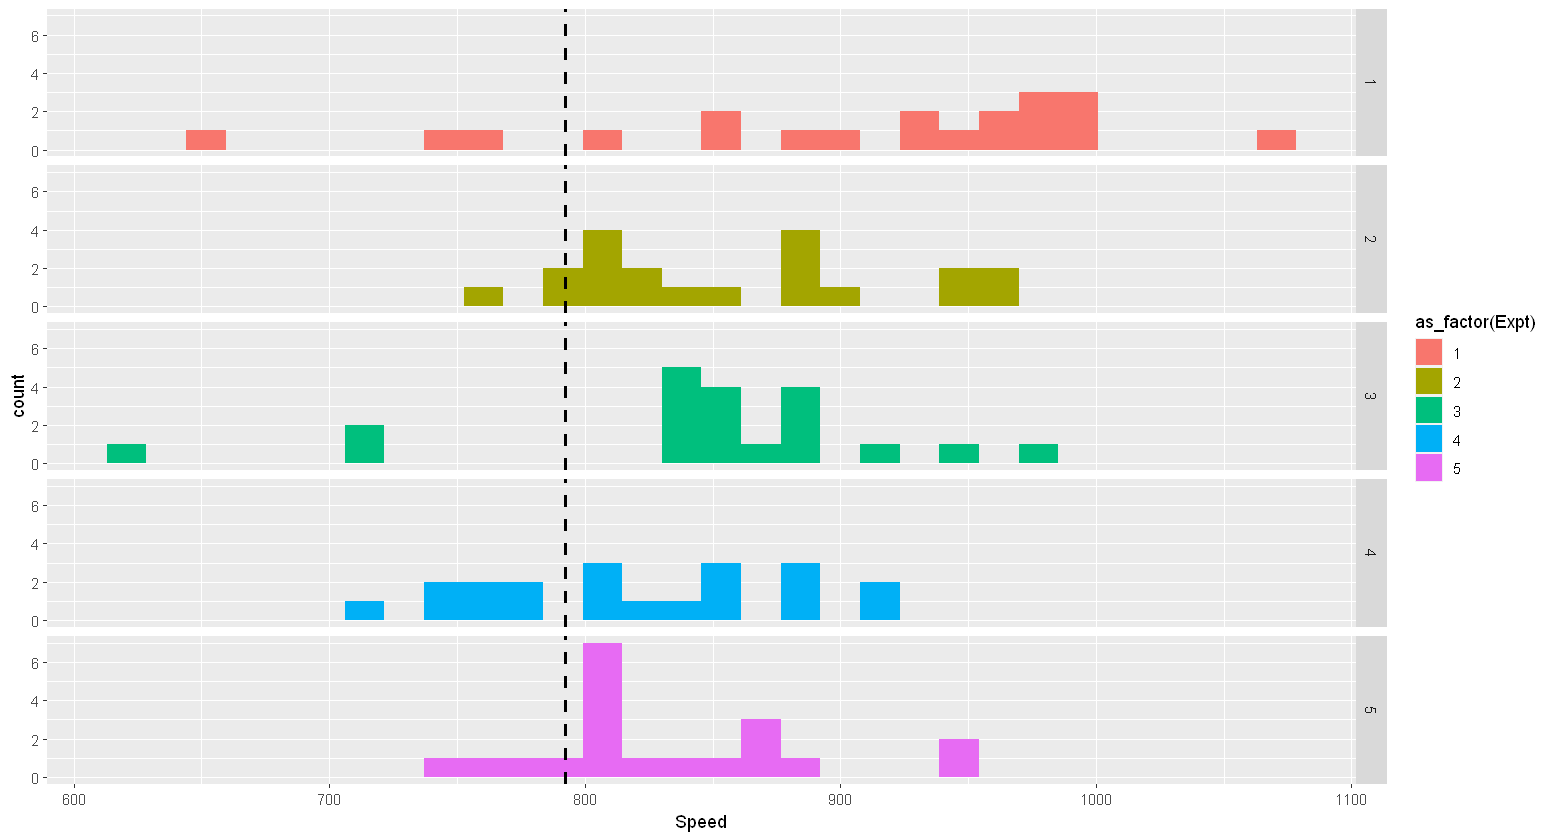

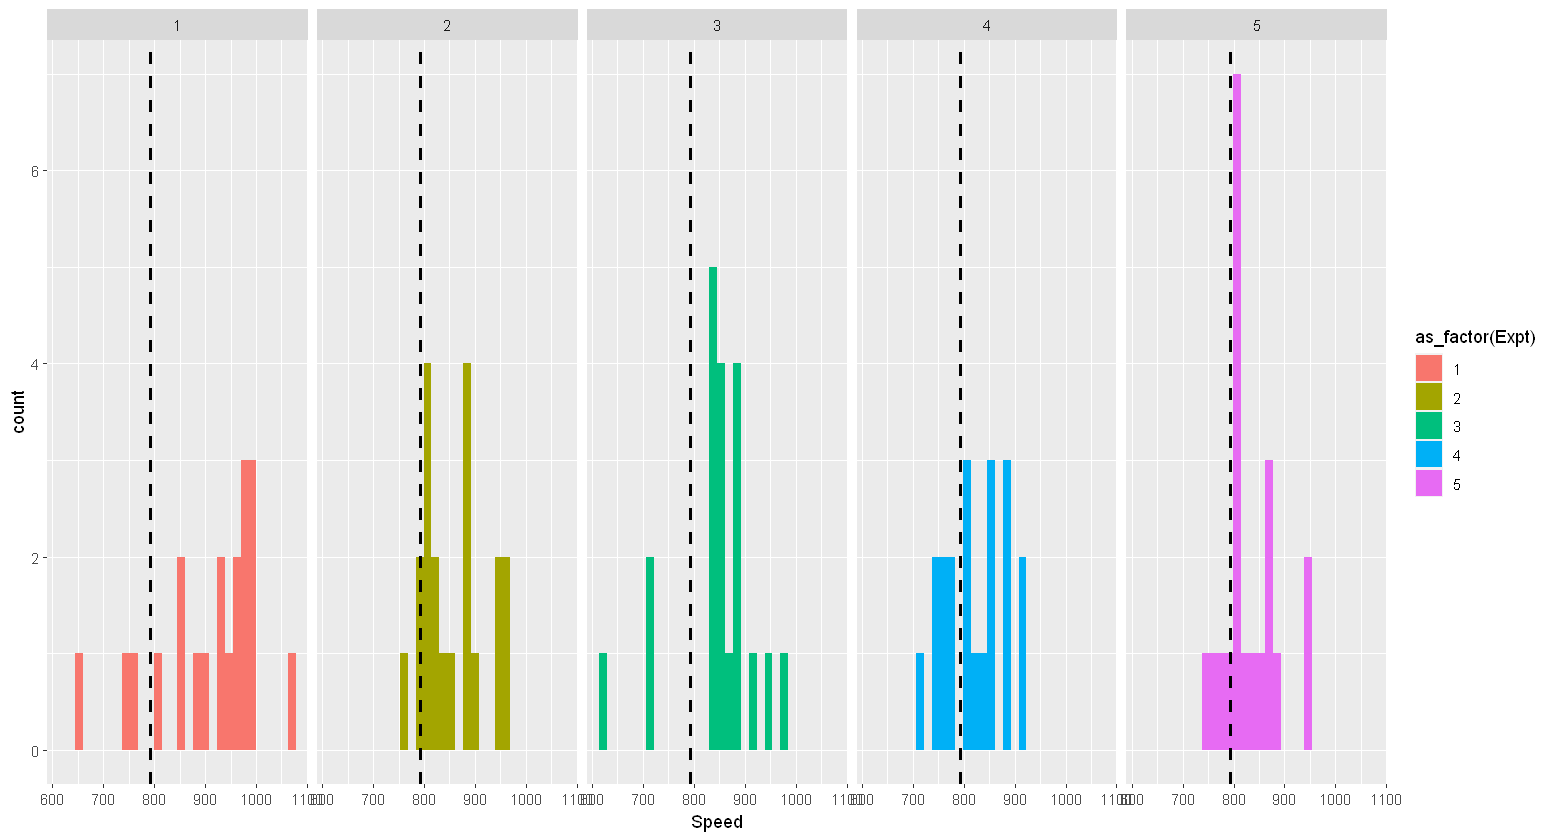

In [82]:
# display horizontally
morley_hist <- ggplot(morley, aes(x = Speed, fill = as_factor(Expt))) +
  geom_histogram() +
  facet_grid(rows = vars(Expt)) +
  geom_vline(xintercept = 792.458, linetype = "dashed", size = 1.0)

morley_hist

# display vertically
morley_hist2 <- ggplot(morley, aes(x = Speed, fill = as_factor(Expt))) +
  geom_histogram() +
  facet_grid(cols = vars(Expt)) +
  geom_vline(xintercept = 792.458, linetype = "dashed", size = 1.0)

morley_hist2

### 4.5.3 `fct_reorder()`

Reorder parameter values according to some parameter. (Often used within `aes()` function) 
- The first parameter in `fct_reorder` defines the column to be reordered.
- The second parameter is the criteria used for ordering.
- The `fct_reorder` function uses **ascending** order by default, we can change to descending by setting `.desc = TRUE`

E.g. `aes(..., y = fct_reorder(landmass, size, .desc = TRUE),...)` This sort column of landmass by their size in a descending order 

### 4.5.4 Important properties of `fill` and `color` in the `aes()` function:

* `fill = `
    * With `geom_bar()`/`geom_histogram()`, this aesthetic **fills in the bars** by a specific colour or separates the counts by a variable different from the x-axis.  
$~$
* `color = `
    * With `geom_bar()`/`geom_histogram(),  this aesthetic **outlines the bars** by a specific colour or separates the counts by a variable different from the x-axis.
    * With `geom_point()`, it **fills in the points** (colouring them based on a particular *(categorical)* variable aside from the x/y-axis)  

### 4.6 Review exercises for data visualizations
___

In [16]:
fast_food <- read_csv("data/fast_food.csv")
fast_food

Rows: 10000 Columns: 2

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (2): name, st


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



name,st
<chr>,<chr>
McDonald's,NY
Wendy's,OH
Frisch's Big Boy,KY
⋮,⋮
Five Guys,CO
El Pollo Loco,CA
Carl's Jr.,CA


**Exercise 1**

Display the top 5 restaurants (by count) on a bar plot where:
1. The bar plot has horizontal bars.
2. The restaurant with the greatest number of counts should be on top and the one with lowest should be on the bottom.

Name your data frame `restaurant_counts`.

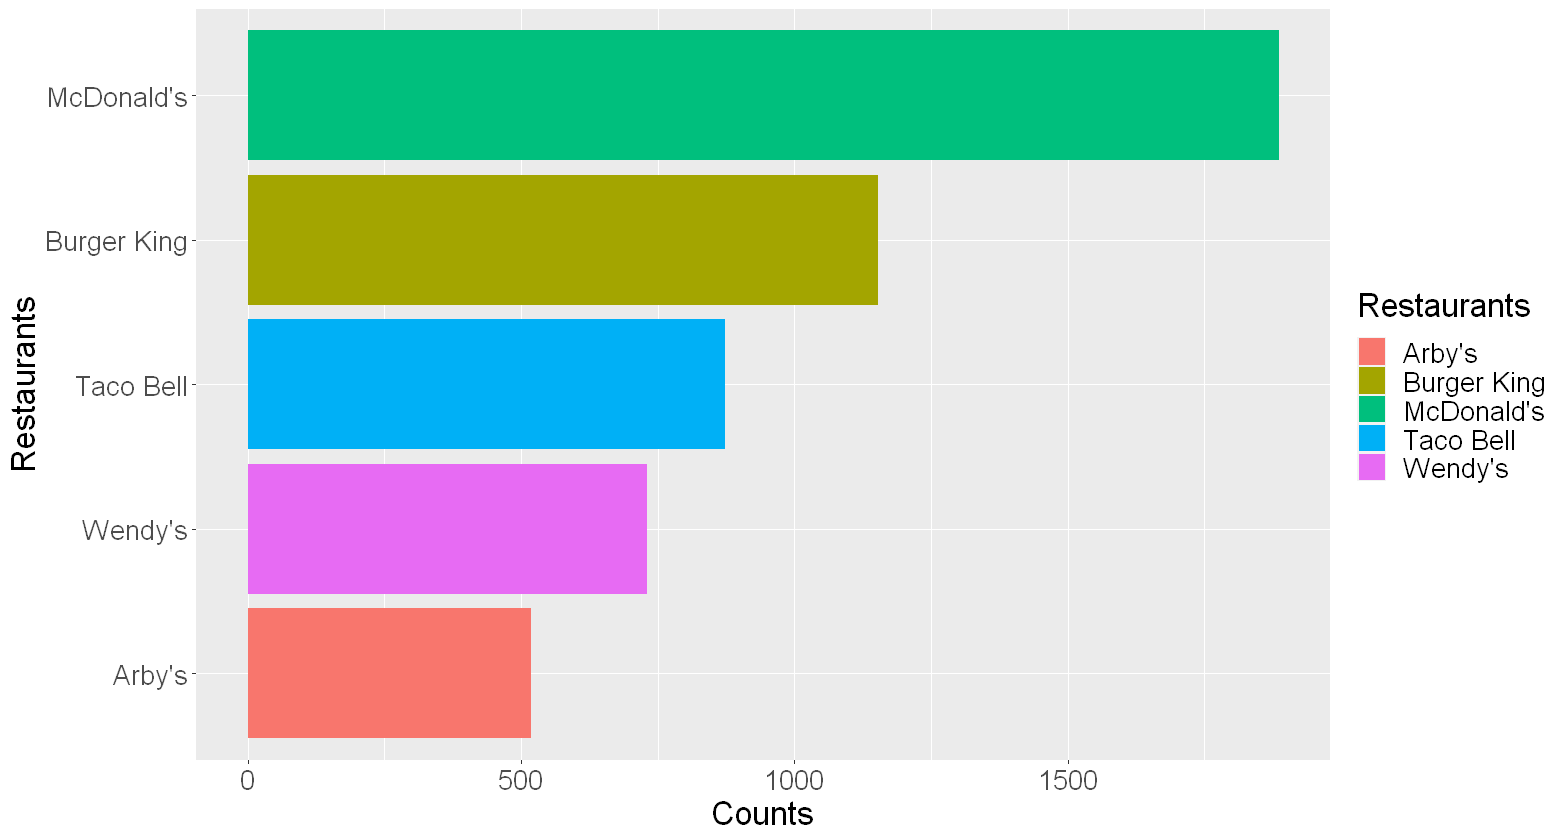

In [85]:
options(repr.plot.width = 13, repr.plot.height = 7)

restaurant_counts <- fast_food |> 
    group_by(name) |> 
    summarize(counts = n()) |>
    slice_max(order_by = counts, n = 5) |>
    ggplot(aes(x = fct_reorder(name, counts),
               y = counts,
               fill = name)) +
    geom_bar(stat = 'identity') +
    coord_flip() +
    labs(x = "Restaurants", y = "Counts", fill = "Restaurants") +
    theme(text = element_text(size = 20))

restaurant_counts

**How to save a plot as a `.png`/`.jpg`/`.bmp`/`.tiff`/`.svg` file on your workspace**
* `ggsave("dataframe_plot.png", dataframe)`
    * replace .png with .jpg/.bmp/.tiff/.svg  for different formats
    * saves plot in folder.
  
  
* `print(paste("PNG filesize: ", file.info("faithful_plot.png")["size"] / 1000000, "MB"))`
    * replace PNG with JPG/BMP/TIFF/SVG
    * checks size of file.